# Data Source and Loading 

Source :https://data.worldbank.org/indicator/en.atm.co2e.pc

In [37]:
import pandas as pd
df_c=pd.read_csv("data.csv",skiprows=3)
df_c.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,24.507516,13.157722,8.353561,8.410064,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,...,0.406424,0.345149,0.310341,0.293946,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210531,0.202737,0.213560,0.205891,...,1.252681,1.330219,1.253776,1.290307,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,...,1.803715,1.692908,1.749211,1.978763,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,5.867410,5.916884,5.901775,5.832906,NaN,NaN,NaN,NaN,NaN,NaN


# Data- Cleaning / Manipulation / Transforamtion

We want to perform time series analysis hence we need to transform data to use datetime aspect of the data

In [38]:
def populate_df(row):
    index = str(row['date'].year)
    value = df_c_world.loc[index]
    return value
  
df_c_world = df_c[df_c['Country Name']=='World'].loc[:,'1960':'2019']

df_c_world = df_c_world.T

df_c_world.columns = ['value']
date_rng = pd.date_range(start='31/12/1960', end='01/01/2019', freq='y')
emission = pd.DataFrame(date_rng, columns=['date'])

# Populate the new DataFrame using the values from the raw data slice
v = emission.apply(lambda row: populate_df(row), axis=1)
emission['Global CO2 Emissions per Capita'] = v
emission.set_index('date', inplace=True)
emission.head()

,Global CO2 Emissions per Capita
date,
1960-12-31,3.099157
1961-12-31,3.070018
1962-12-31,3.140957
1963-12-31,3.245109
1964-12-31,3.361380


In [39]:
emission.dropna(inplace=True)
emission.head()

,Global CO2 Emissions per Capita
date,
1960-12-31,3.099157
1961-12-31,3.070018
1962-12-31,3.140957
1963-12-31,3.245109
1964-12-31,3.361380


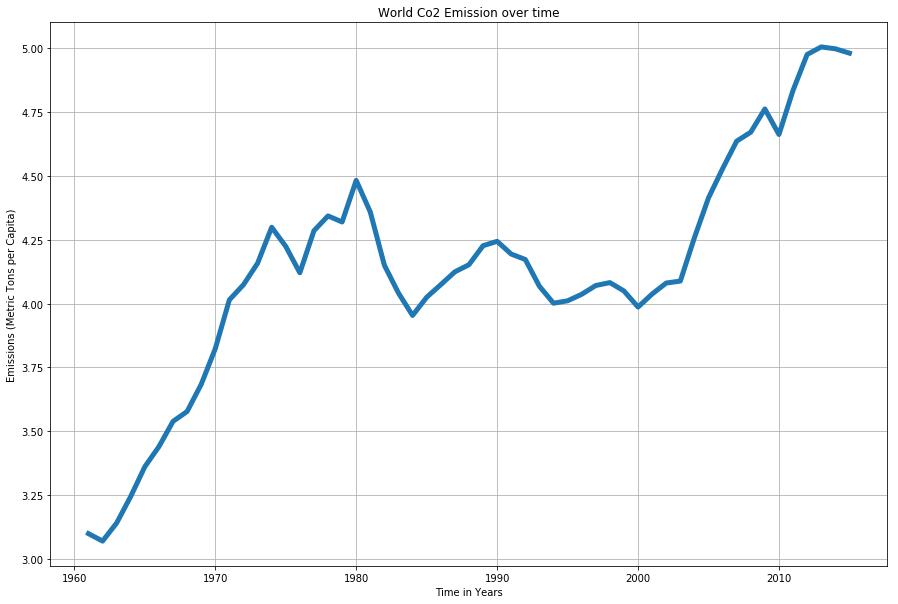

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(emission,linewidth=5.0)
plt.grid()
plt.xlabel("Time in Years")
plt.ylabel("Emissions (Metric Tons per Capita)")
plt.title("World Co2 Emission over time")
plt.show()

In [41]:
#!pip3 install cufflinks
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [42]:
emission.iplot(kind='line', xTitle='Time (years)', color='#3393FF',
                  yTitle='Emissions (Metric Tons per Capita)', title='Global CO2 Emission over Time')



# Calculate first difference

Seasonal Patterns in Time Series Data
One way to think about the seasonal components to the time series of your data is to remove the trend from a time series, so that you can more easily investigate seasonality. To remove the trend, you can subtract the trend you computed above (rolling mean) from the original signal. This, however, will be dependent on how many data points you averaged over.

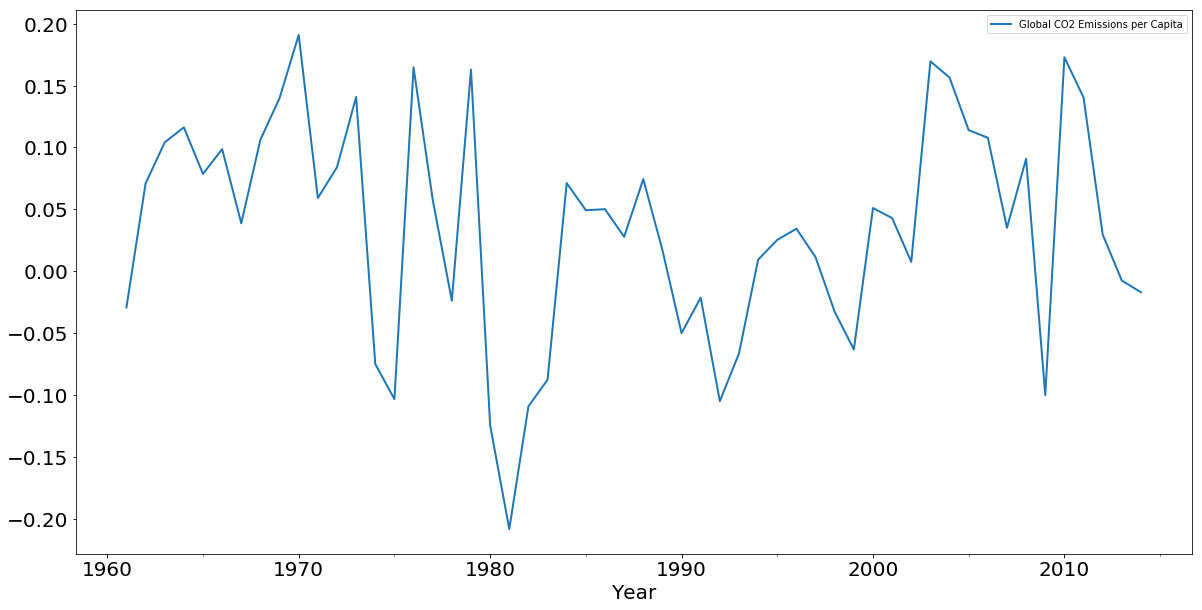

In [43]:
emission.diff().plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Year', fontsize=20);

Normalized Cross-Correlation in Python

a = (a - np.mean(a)) / (np.std(a) * len(a))

b = (b - np.mean(b)) / (np.std(b))

c = np.correlate(a, b, 'full')

Another approach is called link relatives. Link relatives are similar, but they divideeach point by the point that came before it: